## Ensemble Methods

Problem Statement: Build a model that predicts the loan status of the applicant considering different factors like Age, Income, Credit history etc

## Step1: Data Gathering

In [1]:
import pandas as pd 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/train_loan.csv'
df = pd.read_csv(path)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Step2: Perform basic data quality checks

In [3]:
df.shape

(58645, 13)

In [4]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
## check missing values
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
## Check the duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop_duplicates()

## Step3: Separate X and Y features
    Y => loan_status
    X => Remaining all others columns

In [9]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [10]:
X = df.drop(columns=['id','loan_status'])
Y = df[['loan_status']]

In [11]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [12]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


## Step4: Data Preprocessing and Data Cleaning 

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [14]:
cat = list(X.columns[X.dtypes == 'object'])
con = list(X.columns[X.dtypes != 'object'])

In [15]:
print(cat)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [16]:
print(con)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [17]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [18]:
con_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [19]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',con_pipe,con)
]).set_output(transform='pandas')

In [20]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298


## Step6: Split the data into training and testing 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=21)

In [23]:
xtrain.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
49371,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.074446,-0.264855,0.075506,0.140632,0.926666,0.335502,1.039036
33104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.754307,-0.923845,0.580588,-0.758041,0.023767,0.117378,-0.698298
53030,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.571697,0.156966,-0.177035,0.931464,-0.253034,0.444564,0.790845
54909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.091305,-0.370311,-0.177035,-0.578306,1.091428,-0.427932,0.294464
27249,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.571697,-0.370311,0.075506,0.050765,-0.009185,0.335502,0.294464


In [24]:
xtest.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
40062,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,0.288785,0.328047,1.039305,-0.921970,0.444564,-0.698298
30128,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.085808,-0.818495,0.075506,-1.117510,0.267616,-0.755118,-0.946489
34643,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.731951,1.475156,-0.429576,1.039305,1.124381,-0.318870,2.031798
39635,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.422806,1.527884,-1.187200,0.500101,-1.116389,-0.646056,-0.450108
32787,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.085808,-1.055770,-0.682117,0.140632,2.172270,2.843926,-0.698298


In [25]:
ytrain.head()

,loan_status
49371,0
33104,1
53030,0
54909,0
27249,0


In [26]:
ytest.head()

,loan_status
40062,0
30128,0
34643,0
39635,0
32787,1


## Step7.1: Model Building

#### Bagging model : Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model = RandomForestClassifier(
    n_estimators=5,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini'
)
model.fit(xtrain,ytrain)

,n_estimators,5
,criterion,'gini'
,max_depth,4
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
model.score(xtrain,ytrain)

0.9257609344360133

In [30]:
model.score(xtest,ytest)

0.9258248785062665

## Hyperparameter tuning- overfitting scenario, choose the best parameters required for the model

In [31]:
params = {
    'n_estimators':[5,10,35,50,75,100,150],
    'max_depth':[3,5,7,9,11]
}

## To perform hyperparameter tuning, I am considering RandomSearchCV

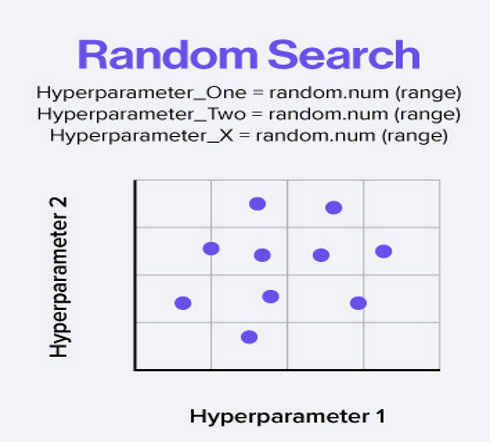

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
base_model = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=base_model,param_distributions=params,cv=3,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [3, 5, ...], 'n_estimators': [5, 10, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [34]:
rscv.best_params_

{'n_estimators': 150, 'max_depth': 11}

In [35]:
rscv.best_score_

np.float64(0.8837262613043432)

In [36]:
best_rfc = rscv.best_estimator_

In [37]:
best_rfc.score(xtrain,ytrain)

0.9547702276408901

In [38]:
best_rfc.score(xtest,ytest)

0.95046466024384

## Step8: Model Evaluation

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
ypred_test = model.predict(xtest)
ypred_test[:5]

array([0, 0, 0, 0, 1])

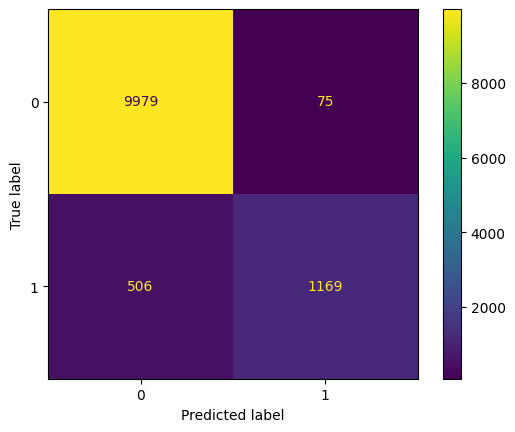

In [41]:
ConfusionMatrixDisplay.from_estimator(best_rfc,xtest,ytest)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10054
           1       0.84      0.60      0.70      1675

    accuracy                           0.93     11729
   macro avg       0.89      0.79      0.83     11729
weighted avg       0.92      0.93      0.92     11729



## Let's build Gradient Boost and XGBoost. We shall choose the best model among these three

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

*Learning Rate: 0.0001 - 1*

In [45]:
gbc = GradientBoostingClassifier(
    n_estimators=5,
    learning_rate=0.01,
    max_depth=4,
    min_samples_leaf=3,
    min_samples_split=5
)
gbc.fit(xtrain,ytrain)

,loss,'log_loss'
,learning_rate,0.01
,n_estimators,5
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,5
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [46]:
gbc.score(xtrain,ytrain)

0.8577244436865888

In [47]:
gbc.score(xtest,ytest)

0.8571915764344786

## Hypermarameter Tuning

In [50]:
params ={
    'n_estimators':[3,5,10,15,20,50,100],
    'learning_rate':[0.001,0.01,0.1,0.15],
    'max_depth':[3,4,5,6,7,8]
}

In [51]:
params

{'n_estimators': [3, 5, 10, 15, 20, 50, 100],
 'learning_rate': [0.001, 0.01, 0.1, 0.15],
 'max_depth': [3, 4, 5, 6, 7, 8]}

In [52]:
base_model2 = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(estimator=base_model2,param_distributions=params,cv=3,scoring='f1_macro')
rscv2.fit(xtrain,ytrain)

,estimator,GradientBoostingClassifier()
,param_distributions,"{'learning_rate': [0.001, 0.01, ...], 'max_depth': [3, 4, ...], 'n_estimators': [3, 5, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [53]:
rscv2.best_score_

np.float64(0.8798811595542578)

In [54]:
rscv2.best_params_

{'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.1}

In [55]:
best_gbc = rscv2.best_estimator_

In [56]:
best_gbc.score(xtrain,ytrain)

0.9505286043140933

In [57]:
best_gbc.score(xtest,ytest)

0.9484184499957371

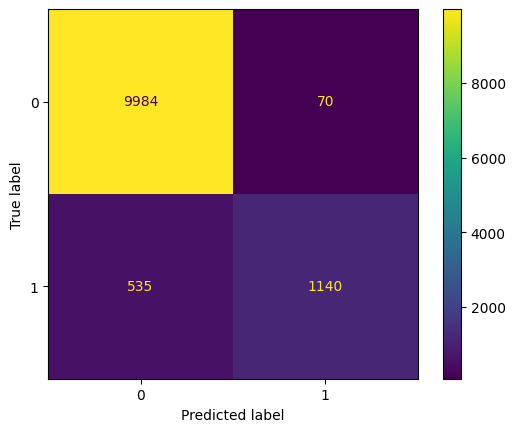

In [58]:
ConfusionMatrixDisplay.from_estimator(best_gbc,xtest,ytest)

In [59]:
ypred_test2 = best_gbc.predict(xtest)

In [60]:
print(classification_report(ytest,ypred_test2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10054
           1       0.94      0.68      0.79      1675

    accuracy                           0.95     11729
   macro avg       0.95      0.84      0.88     11729
weighted avg       0.95      0.95      0.94     11729



In [61]:
## XGBOOST

In [62]:
pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 1.7 MB/s eta 0:00:43
    --------------------------------------- 1.0/72.0 MB 1.8 MB/s eta 0:00:41
    --------------------------------------- 1.6/72.0 MB 1.8 MB/s eta 0:00:39
   - -------------------------------------- 2.1/72.0 MB 2.0 MB/s eta 0:00:36
   - -------------------------------------- 2.6/72.0 MB 2.0 MB/s eta 0:00:35
   - -------------------------------------- 3.1/72.0 MB 2.1 MB/s eta 0:00:33
   -- ------------------------------------- 3.9/72.0 MB 2.2 MB/s eta 0:00:31
   -- ------------------------------------- 4.5/72.0 MB 2.3 MB/s eta 0:00:29
   -- ------------------------------------- 5.2/72.0 MB 2.4 MB/s eta 0:00:28
   --- ------------------------------------ 5.8/72.0 MB 2.4 MB/s eta 0:00:28
   --- -------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Rest the kernal once this is done

## IFF you are getting error while installing XGboost
    cd .venv/scritps
    python.exe -m ensurepip 
    pip install xgboost

In [63]:
from xgboost import XGBClassifier

In [64]:
model3 = XGBClassifier(
    n_estimator=50,
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=5,
    min_sample_split=4
)
model3.fit(xtrain,ytrain)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [65]:
model3.score(xtrain,ytrain)

0.9541094722482735

In [66]:
model3.score(xtest,ytest)

0.9529371642936312

## Hyperparameter tuning

In [68]:
params = {
    'n_estimator':[10,30,50,75,100,150],
    'max_depth':[5,7,10,15],
    'learning_rate':[0.001,0.01,0.015,0.1,0.15]
}

In [71]:
base_model3 = XGBClassifier()
rscv3 = RandomizedSearchCV(estimator=base_model3,param_distributions=params,cv=4,scoring='f1_macro')
rscv3.fit(xtrain,ytrain)

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'learning_rate': [0.001, 0.01, ...], 'max_depth': [5, 7, ...], 'n_estimator': [10, 30, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [72]:
rscv3.best_score_

np.float64(0.8921145581177143)

In [73]:
rscv3.best_params_

{'n_estimator': 50, 'max_depth': 7, 'learning_rate': 0.15}

In [74]:
best_xgb = rscv3.best_estimator_

In [75]:
best_gbc.score(xtrain,ytrain)

0.9505286043140933

In [76]:
best_gbc.score(xtest,ytest)

0.9484184499957371

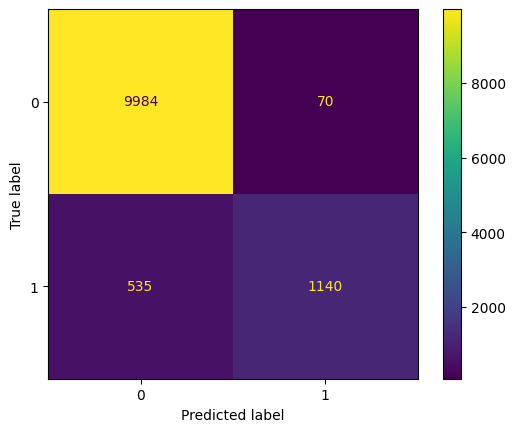

In [77]:
ConfusionMatrixDisplay.from_estimator(best_gbc,xtest,ytest)

In [79]:
ypred_test3 = best_gbc.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred_test3))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10054
           1       0.94      0.68      0.79      1675

    accuracy                           0.95     11729
   macro avg       0.95      0.84      0.88     11729
weighted avg       0.95      0.95      0.94     11729



## Final Model building: XGB classifier output looks good,. we can consider this for final model building

In [81]:
df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0


In [82]:
path2 = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/test_loan.csv'
xnew = pd.read_csv(path2)
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [83]:
pre

,transformers,"[('cat', ...), ('con', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [84]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [86]:
xnew2 = xnew.drop(columns='id')
xnew2.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [87]:
xnew_pre = pre.transform(xnew2)

In [88]:
xnew_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108


In [89]:
loan_status_predicted = best_xgb.predict(xnew_pre)

In [91]:
loan_status_predicted[:5]

array([1, 0, 1, 0, 0])

In [92]:
xnew['Predicted_Loan_Status'] = loan_status_predicted

In [93]:
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Predicted_Loan_Status
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,1
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,0
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,1
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0


In [94]:
xnew.to_csv('Predicted Loan Results.csv',index=False)